C:\Users\DELL\AppData\Local\Temp\ipykernel_1804\3946273740.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_1804\3946273740.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


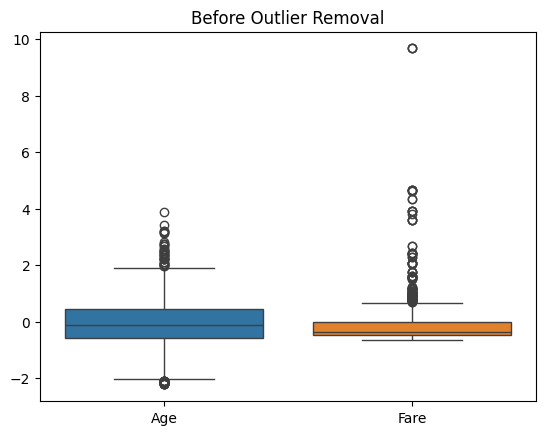

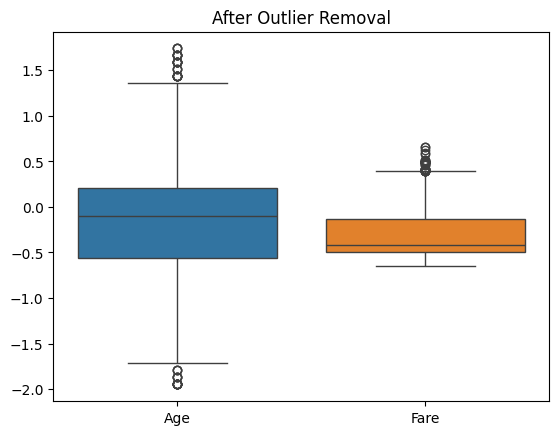

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,1,0,A/5 21171,-0.502445,2
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,0,0,STON/O2. 3101282,-0.488854,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,1,0,113803,0.420730,2
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,0,0,373450,-0.486337,2
5,6,0,3,"Moran, Mr. James",1,-0.104637,0,0,330877,-0.478116,1


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column
df.drop('Cabin', axis=1, inplace=True)

# Check for missing values
print(df.isnull().sum())

# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])        # male=1, female=0
df['Embarked'] = le.fit_transform(df['Embarked'])  # C=0, Q=1, S=2

# Standardize numerical features
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Boxplot before outlier removal
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Before Outlier Removal")
plt.show()

# Function to remove outliers using IQR
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return data[(data[column] >= Q1 - 1.5 * IQR) & (data[column] <= Q3 + 1.5 * IQR)]

# Remove outliers
df = remove_outliers(df, 'Fare')
df = remove_outliers(df, 'Age')

# Boxplot after outlier removal
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("After Outlier Removal")
plt.show()

# Save cleaned data
df.to_csv("Titanic_cleaned.csv", index=False)
df.head()
